In [6]:
%timeit
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import os

In [7]:
%timeit
Case  = "16 Typhoon cases"
fTime = "20100919060000"
period= "All"

files=np.zeros(4)

path1='/home/miayao/average/maple_144/alldata/'+period
path2='/home/miayao/average/maple_144/typhoon/'+period
path3='/home/miayao/average/maple_144/QPESUMS/'+period

files1=os.listdir(path1)
files2=os.listdir(path2)
files3=os.listdir(path3)


ets_maple48=[]
ets_maple144=[]
ets_com=[]
ets_wrf=[]
a=0
b=0
c=0
d=0

for file in files1:
    if not os.path.isdir(file):
        f=nc.Dataset(path1+'/'+file)
        ets_maple48.append((f.variables['BIAS'][:]))
        a +=1

for file in files2:
    if not os.path.isdir(file):
        f=nc.Dataset(path2+'/'+file)
        ets_maple144.append((f.variables['BIAS'][:]))
        b +=1
        
for file in files3:
    if not os.path.isdir(file):
        f=nc.Dataset(path3+'/'+file)
        ets_com.append((f.variables['BIAS'][:]))
        c +=1
        

In [8]:
ets_maple48=np.array(ets_maple48[:])
ets_maple48=np.where(ets_maple48==-999,np.nan,ets_maple48)
avg_ets_maple48=np.nanmean(ets_maple48,axis=0)

ets_maple144=np.array(ets_maple144[:])
ets_maple144=np.where(ets_maple144==-999,np.nan,ets_maple144)
avg_ets_maple144=np.nanmean(ets_maple144,axis=0)

ets_com=np.array(ets_com[:])
ets_com=np.where(ets_com==-999,np.nan,ets_com)
avg_ets_com=np.nanmean(ets_com,axis=0)


/home/miayao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/home/miayao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/home/miayao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()


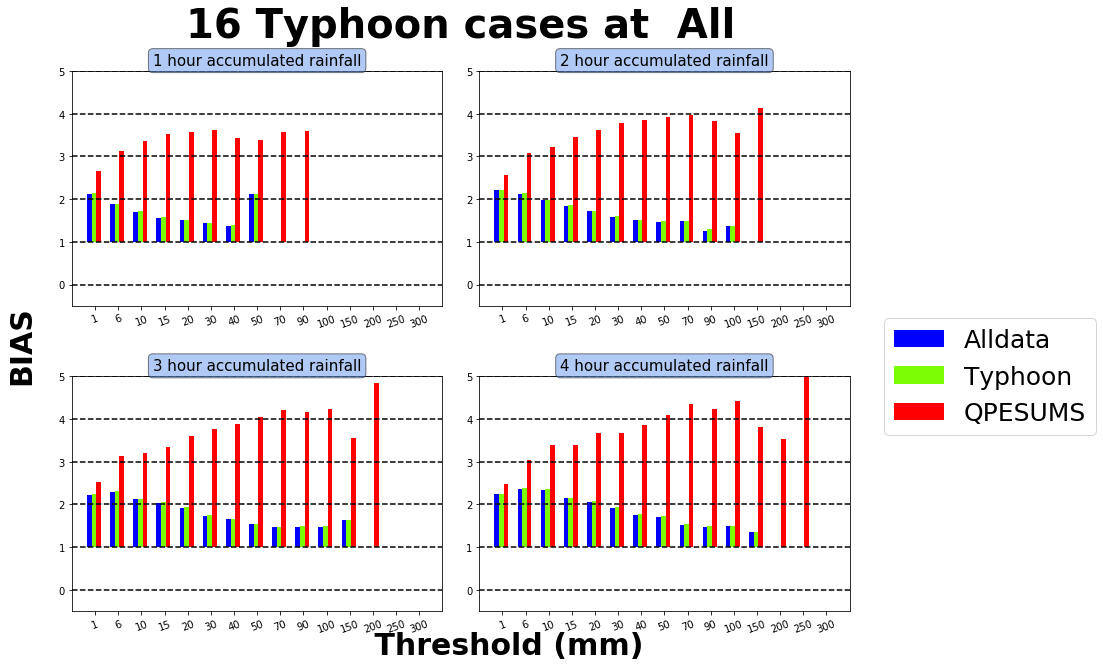

In [12]:
#####Start plot ###############

barWidth = 0.2
legend_name=['MAPLE48','MAPLE144','MAPLE_WRF','WRF']
TH=[1,6,10,15,20,30,40,50,70,90,100,150,200,250,300]
N=len(TH)
x =np.linspace(0.,N-1,N)

fig, ax = plt.subplots(2,2)
ax[0,0].bar(x-0.25,avg_ets_maple48[0,:],barWidth,label='Alldata',color='blue',bottom=1.0)
ax[0,0].bar(x-0.05,avg_ets_maple144[0,:],barWidth,label='Typhoon',color='lawngreen',bottom=1.0)
ax[0,0].bar(x+0.15,avg_ets_com[0,:],barWidth,label='QPESUMS',color='red',bottom=1.0)

ax[0,1].bar(x-0.25,avg_ets_maple48[1,:],barWidth,label='Alldata',color='blue',bottom=1.0)
ax[0,1].bar(x-0.05,avg_ets_maple144[1,:],barWidth,label='Typhoon',color='lawngreen',bottom=1.0)
ax[0,1].bar(x+0.15,avg_ets_com[1,:],barWidth,label='QPESUMS',color='red',bottom=1.0)

ax[1,0].bar(x-0.25,avg_ets_maple48[2,:],barWidth,label='Alldata',color='blue',bottom=1.0)
ax[1,0].bar(x-0.05,avg_ets_maple144[2,:],barWidth,label='Typhoon',color='lawngreen',bottom=1.0)
ax[1,0].bar(x+0.15,avg_ets_com[2,:],barWidth,label='QPESUMS',color='red',bottom=1.0)

ax[1,1].bar(x-0.25,avg_ets_maple48[3,:],barWidth,label='Alldata',color='blue',bottom=1.0)
ax[1,1].bar(x-0.05,avg_ets_maple144[3,:],barWidth,label='Typhoon',color='lawngreen',bottom=1.0)
ax[1,1].bar(x+0.15,avg_ets_com[3,:],barWidth,label='QPESUMS',color='red',bottom=1.0)

for i in range(2):
    for j in range(2):

        ax[i,j].set_xticks(x)
        ax[i,j].set_xlim(-1,15)
        ax[i,j].set_xticklabels(TH,rotation=20)
        ax[i,j].set_ylim(-0.5,5)
        for a in range(6):
            ax[i,j].plot([-1,15],[a ,a],'--',color='black')

ax[0,1].legend(loc=1,bbox_to_anchor=(1.7,0.0),fontsize=25)
ax[0,0].set_title('1 hour accumulated rainfall',size=15,bbox=dict(boxstyle='round',facecolor='cornflowerblue',alpha=0.5))
ax[0,1].set_title('2 hour accumulated rainfall',size=15,bbox=dict(boxstyle='round',facecolor='cornflowerblue',alpha=0.5))
ax[1,0].set_title('3 hour accumulated rainfall',size=15,bbox=dict(boxstyle='round',facecolor='cornflowerblue',alpha=0.5))
ax[1,1].set_title('4 hour accumulated rainfall',size=15,bbox=dict(boxstyle='round',facecolor='cornflowerblue',alpha=0.5))
# for xx,yy in zip(x,list(avg_ets_maple48[0,:])):
#     if str(yy) == 'nan' :
#         ax[0,0].text(xx-0.3,1.3,'N/A',rotation=80,size=8)
# for xx,yy in zip(x,list(avg_ets_maple144[0,:])):
#     if str(yy) == 'nan' :
#         ax[0,0].text(xx-0.1,1.3,'  N/A',rotation=80,size=8)
# for xx,yy in zip(x,list(avg_ets_com[0,:])):
#     if str(yy) == 'nan' :
#         ax[0,0].text(xx+0.1,1.3,'    N/A',rotation=80,size=8)


# for xx,yy in zip(x,list(avg_ets_maple48[1,:])):
#     if str(yy) == 'nan' :
#         ax[0,1].text(xx-0.3,1.3,'N/A',rotation=80,size=7)
# for xx,yy in zip(x,list(avg_ets_maple144[1,:])):
#     if str(yy) == 'nan' :
#         ax[0,1].text(xx-0.1,1.3,'N/A',rotation=80,size=7)
# for xx,yy in zip(x,list(avg_ets_com[1,:])):
#     if str(yy) == 'nan' :
#         ax[0,1].text(xx+0.1,1.3,'N/A',rotation=80,size=7)


# for xx,yy in zip(x,list(avg_ets_maple48[2,:])):
#     if str(yy) == 'nan' :
#         ax[1,0].text(xx-0.3,1.3,'N/A',rotation=80,size=7)
# for xx,yy in zip(x,list(avg_ets_maple144[2,:])):
#     if str(yy) == 'nan' :
#         ax[1,0].text(xx-0.1,1.3,'N/A',rotation=80,size=7)
# for xx,yy in zip(x,list(avg_ets_com[2,:])):
#     if str(yy) == 'nan' :
#         ax[1,0].text(xx+0.1,1.3,'N/A',rotation=80,size=7)

# for xx,yy in zip(x,list(avg_ets_maple48[3,:])):
#     if str(yy) == 'nan' :
#         ax[1,1].text(xx-0.3,1.3,'N/A',rotation=80,size=7)
# for xx,yy in zip(x,list(avg_ets_maple144[3,:])):
#     if str(yy) == 'nan' :
#         ax[1,1].text(xx-0.1,1.3,'N/A',rotation=80,size=7)
# for xx,yy in zip(x,list(avg_ets_com[3,:])):
#     if str(yy) == 'nan' :
#         ax[1,1].text(xx+0.1,1.3,'N/A',rotation=80,size=7)


fig.suptitle(Case +' at  '+period,x=0.5,y=0.94,size=40,weight='heavy')
fig.subplots_adjust(top=0.85,bottom=0.1,left=0.2,right=0.8,wspace=0.1,hspace=0.3)           
plt.text(-6.,-1.5,' Threshold (mm)',size=30,weight='heavy')       
fig.text(0.15,0.47,'BIAS',va='center',rotation='vertical',size=30,weight='heavy')


fig = plt.gcf()
fig.set_size_inches(18,10)
fig.savefig('/home/miayao/average/'+Case+'_bias_'+period+'_all.png',dpi=300)
